In [1]:
import pdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
import cartopy.crs as ccrs
import pickle as pkl
import glob
import xesmf as xe

import scipy

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

ModuleNotFoundError: No module named 'xesmf'

In [35]:
from scipy.interpolate import griddata

def griddata_lin(data, x, y, new_x, new_y):

    """
    :param x: current x variables (1 or 2d, definitely 2d if irregular!)
    :param y: current y variables (1 or 2d, definitely 2d if irregular!)
    :param new_x: target x vars
    :param new_y: target y vars
    :return:  triangulisation lookup table, point weights, 2d shape - inputs for interpolation func
    """

    if x.ndim == 1:
        grid_xs, grid_ys = np.meshgrid(x, y)
    else:
        grid_xs = x
        grid_ys = y

    if new_x.ndim == 1:
        new_xs, new_ys = np.meshgrid(new_x, new_y)
    else:
        new_xs = new_x
        new_ys = new_y

    points = np.array((grid_xs.flatten(), grid_ys.flatten())).T
    inter = np.array((np.ravel(new_xs), np.ravel(new_ys))).T
    shape = new_xs.shape

    # Interpolate using delaunay triangularization
    data = griddata(points, data.flatten(), inter, method='linear')
    data = data.reshape((shape[0], shape[1]))

    return data

In [2]:
cp4_path = '/home/users/cornkle/lmcs/sensitivity_runs_wg_mcs/20060725T0600Z/u-dd307/20060725T0600Z/Sahel/1p5km/RA3/um/'

In [3]:
tag = 'STASH_m01s00i'
vdic = { 'u' : tag+'002',
         'v' : tag+'003',
         'theta' : tag+'004',
         'q' : tag+'010',
         'qcf' : tag+'012',
         'w' : tag+'150',
         'qcl' : tag+'254',
         'LCF' : tag+'267',
         'FCF' : tag+'268',
         'pressure_rho' : tag+'407',
         'pressure_theta' : tag+'408',
}

In [138]:
tag = 'STASH_m01s03i'
tag0 = 'STASH_m01s00i'
tag1 = 'STASH_m01s01i'
vdic = { 'tsk' : tag0+'024',
         't2' : tag+'236_2', #1.5m
         'u10' : tag+'225_2',
         'v10' : tag+'226_2',
         'q' : tag+'237',
         'lh' : tag+'234',
         'sh' : tag+'217',
         'srp' : tag0+'409',
         'frv' : tag+'465',
         'pblh' : tag0+'025'
}

In [120]:
filename = 'surface_vars_20060725_T06.nc'

In [121]:
dat = xr.open_dataset(glob.glob(cp4_path+filename)[0]).isel(T20M_MN=0, T20M=0, T1HR_0=0)  # 'f30205

In [27]:
dat

<xarray.Dataset>
Dimensions:                     (grid_longitude_t: 3360, grid_latitude_t: 2260,
                                 bounds2: 2, T1HR_MN_rad_diag: 1, T1HR_MN: 1,
                                 grid_longitude_uv: 3360,
                                 grid_latitude_uv: 2261, height_10m: 1,
                                 height_1_5m: 1, T20M_MAX: 2, T1HR: 1)
Coordinates: (12/17)
  * grid_longitude_t            (grid_longitude_t) float64 340.0 340.0 ... 385.4
    longitude_t                 (grid_latitude_t, grid_longitude_t) float64 ...
  * grid_latitude_t             (grid_latitude_t) float64 0.00675 ... 30.5
    latitude_t                  (grid_latitude_t, grid_longitude_t) float64 ...
    T1HR_0                      datetime64[ns] 2006-07-25T06:00:00
  * T1HR_MN_rad_diag            (T1HR_MN_rad_diag) datetime64[ns] 2006-07-25T...
    ...                          ...
  * height_10m                  (height_10m) float64 10.0
    T20M                        datetime64[ns] 2006-07-25T06:20:15
    T20M_MN                     datetime64[ns] 2006-07-25T06:20:15
  * height_1_5m                 (height_1_5m) float64 1.5
  * T20M_MAX                    (T20M_MAX) datetime64[ns] 2006-07-25T06:20:15...
  * T1HR                        (T1HR) datetime64[ns] 2006-07-25T07:00:00
Dimensions without coordinates: bounds2
Data variables: (12/46)
    rotated_latitude_longitude  |S1 ...
    grid_longitude_t_bounds     (grid_longitude_t, bounds2) float64 ...
    grid_latitude_t_bounds      (grid_latitude_t, bounds2) float64 ...
    STASH_m01s00i024            (grid_latitude_t, grid_longitude_t) float64 ...
    STASH_m01s00i025            (grid_latitude_t, grid_longitude_t) float64 ...
    STASH_m01s00i409            (grid_latitude_t, grid_longitude_t) float64 ...
    ...                          ...
    STASH_m01s30i404            (grid_latitude_t, grid_longitude_t) float64 ...
    STASH_m01s30i405            (grid_latitude_t, grid_longitude_t) float64 ...
    STASH_m01s30i406            (grid_latitude_t, grid_longitude_t) float64 ...
    STASH_m01s30i461            (grid_latitude_t, grid_longitude_t) float64 ...
    STASH_m01s30i462            (T1HR_MN, grid_latitude_t, grid_longitude_t) float64 ...
    STASH_m01s30i463            (T1HR_MN, grid_latitude_t, grid_longitude_t) float64 ...
Attributes:
    Conventions:  CF-1.6
    source:       Met Office Unified Model v12.0

In [28]:
dat[vdic['sh']].sel(grid_latitude_t=slice(10,15))

<xarray.DataArray 'STASH_m01s03i217' (T1HR_MN: 1, grid_latitude_t: 370,
                                      grid_longitude_t: 3360)>
[1243200 values with dtype=float64]
Coordinates:
  * grid_longitude_t  (grid_longitude_t) float64 340.0 340.0 ... 385.3 385.4
    longitude_t       (grid_latitude_t, grid_longitude_t) float64 ...
  * grid_latitude_t   (grid_latitude_t) float64 10.01 10.02 ... 14.98 14.99
    latitude_t        (grid_latitude_t, grid_longitude_t) float64 ...
    T1HR_0            datetime64[ns] 2006-07-25T06:00:00
  * T1HR_MN           (T1HR_MN) datetime64[ns] 2006-07-25T07:00:00
    T20M              datetime64[ns] 2006-07-25T06:20:15
    T20M_MN           datetime64[ns] 2006-07-25T06:20:15
Attributes:
    long_name:          SURFACE SENSIBLE  HEAT FLUX     W/M2
    standard_name:      surface_upward_sensible_heat_flux
    units:              W m-2
    cell_methods:       T1HR_MN: mean (interval: 45 seconds)
    grid_mapping:       rotated_latitude_longitude
    um_version:         12.0
    um_stash_source:    m01s03i217
    packing_method:     quantization
    precision_measure:  binary
    precision_value:    -14

In [139]:
box = [22+360,32+360, 10, 15]
sh = dat[vdic['sh']].sel(grid_latitude_t=slice(box[2],box[3]), grid_longitude_t=slice(box[0],box[1])).squeeze()
lh = dat[vdic['lh']].sel(grid_latitude_t=slice(box[2],box[3]), grid_longitude_t=slice(box[0],box[1])).squeeze()
u = dat[vdic['u10']].sel(grid_latitude_uv=slice(box[2],box[3]-0.01), grid_longitude_uv=slice(box[0]-0.01,box[1])).squeeze()
v = dat[vdic['v10']].sel(grid_latitude_uv=slice(box[2],box[3]-0.01), grid_longitude_uv=slice(box[0]-0.01,box[1])).squeeze()
tsk = dat[vdic['tsk']].sel(grid_latitude_t=slice(box[2],box[3]), grid_longitude_t=slice(box[0],box[1])).squeeze()
t2 = dat[vdic['t2']].sel(grid_latitude_t=slice(box[2],box[3]), grid_longitude_t=slice(box[0],box[1])).squeeze()
press = dat[vdic['srp']].sel(grid_latitude_t=slice(box[2],box[3]), grid_longitude_t=slice(box[0],box[1])).squeeze()
fv = dat[vdic['frv']].sel(grid_latitude_t=slice(box[2],box[3]), grid_longitude_t=slice(box[0],box[1])).squeeze()
pblh = dat[vdic['pblh']].sel(grid_latitude_t=slice(box[2],box[3]), grid_longitude_t=slice(box[0],box[1])).squeeze()

In [140]:
R = 8.314462618

# Dry air
Md = dry_air_molecular_weight = 28.96546e-3 # 'kg / mol'
Rd = dry_air_gas_constant = R / Md
dry_air_spec_heat_ratio = 1.4
Cp_d = dry_air_spec_heat_press = (
    dry_air_spec_heat_ratio * Rd / (dry_air_spec_heat_ratio - 1)
)
Cv_d = dry_air_spec_heat_vol = Cp_d / dry_air_spec_heat_ratio

Rd = R/Md

In [141]:
density = press / Rd * t2 / 100000
ws = np.sqrt(u**2+v**2)

In [144]:
import pandas as pd
d = {

'ws': ws.values.flat,
'lh' : lh.values.flat,
'tsk' : tsk.values.flat,
't2' : t2.values.flat,
'p' : press.values.flat,
'fv' : fv.values.flat,
'pblh' : pblh.values.flat
}

df = pd.DataFrame(d)

In [146]:
df.head()

,ws,lh,tsk,t2,p,fv,pblh
0,6.262990,105.056763,300.361572,298.011475,96369.173096,0.295410,268.666992
1,6.252838,113.282959,300.400879,297.983643,96365.289551,0.294861,268.655273
2,6.260701,118.678223,300.254150,297.965820,96359.048096,0.294922,344.753906
3,6.284640,123.675720,300.023438,297.953613,96352.176270,0.295044,344.730469
4,6.324611,125.432800,300.058350,297.967041,96349.205566,0.295471,344.724609


In [147]:
td = {

'sh': sh.values.flat,
}

target = pd.DataFrame(td)

In [148]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming df is your DataFrame with all the features and target variable
scaler = StandardScaler()
features = ['ws', 'lh', 'tsk', 't2', 'p', 'fv', 'pblh']
df[features] = scaler.fit_transform(df[features])

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Split the data into training and testing sets
X = df[features]
y = target['sh']  # This should be your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate the model
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 21.8520548270679


In [167]:
sh = dat[vdic['sh']].squeeze()
lh = dat[vdic['lh']].squeeze()
u = dat[vdic['u10']].isel(grid_latitude_uv=slice(0,-1)).squeeze()
v = dat[vdic['v10']].isel(grid_latitude_uv=slice(0,-1)).squeeze()
tsk = dat[vdic['tsk']].squeeze()
t2 = dat[vdic['t2']].squeeze()
press = dat[vdic['srp']].squeeze()
fv = dat[vdic['frv']].squeeze()
pblh = dat[vdic['pblh']].squeeze()

In [168]:
ws = np.sqrt(u**2+v**2)

In [169]:
ws.size

7593600

In [170]:
sh.size

7593600

In [175]:
d = {

'ws': ws.values.flat,
'lh' : lh.values.flat,
'tsk' : tsk.values.flat,
't2' : t2.values.flat,
'p' : press.values.flat,
'fv' : fv.values.flat,
'pblh' : pblh.values.flat
}

new = pd.DataFrame(d)

In [176]:
scaler = StandardScaler()
features = ['ws', 'lh', 'tsk', 't2', 'p', 'fv', 'pblh']
new[features] = scaler.fit_transform(new[features])

In [177]:
new.head()

,ws,lh,tsk,t2,p,fv,pblh
0,1.232929,1.822025,0.081298,0.026983,1.235249,0.902194,1.597843
1,1.234740,1.822869,0.080130,0.025654,1.235290,0.904209,1.598696
2,1.236789,1.823681,0.078888,0.024224,1.235331,0.906225,1.599533
3,1.238840,1.824508,0.077646,0.022896,1.235372,0.908240,1.600386
4,1.240530,1.825516,0.076404,0.021363,1.235413,0.910927,1.601288


In [180]:
# Using the trained model to predict
new_predictions = model.predict(new)

# Output the predictions
print(new_predictions)

[38.67421814 38.70263489 38.68991943 ... 85.79399658 85.97975281
 81.14689636]


In [182]:
new_pred = np.reshape(new_predictions, sh.shape)

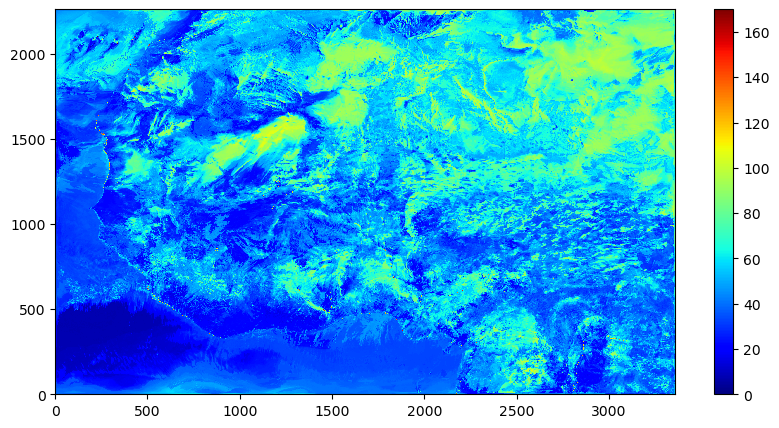

In [186]:
f = plt.figure(figsize=(10,5))
plt.pcolormesh(new_pred, cmap='jet', vmin=0, vmax=170)#, vmin=-0.05, vmax=0.05)
plt.colorbar()

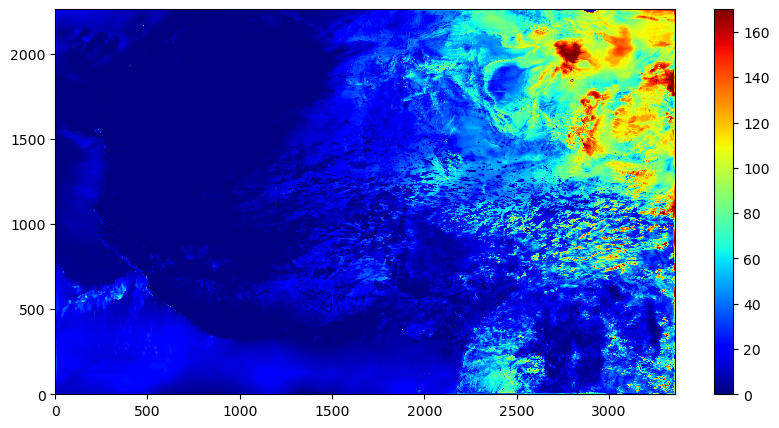

In [187]:
f = plt.figure(figsize=(10,5))
plt.pcolormesh(sh, cmap='jet', vmin=0, vmax=170)#, vmin=-0.05, vmax=0.05)
plt.colorbar()

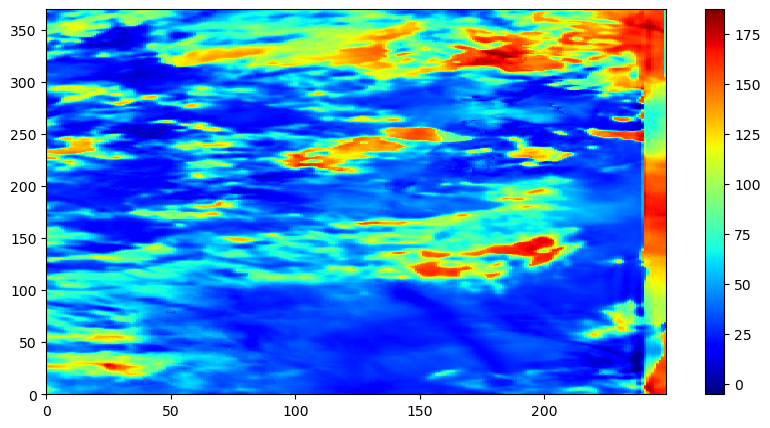

In [131]:
f = plt.figure(figsize=(10,5))
plt.pcolormesh(sh.squeeze(), cmap='jet')#, vmin=-0.05, vmax=0.05)
plt.colorbar()

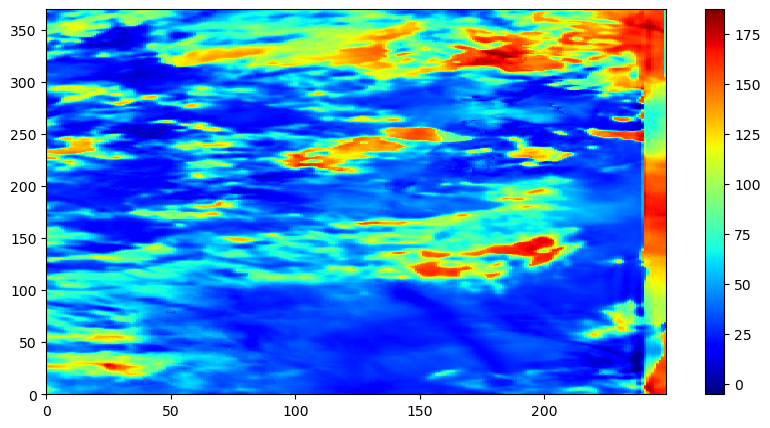

In [98]:
f = plt.figure(figsize=(10,5))
plt.pcolormesh(sh.squeeze(), cmap='jet')
plt.colorbar()

In [100]:
storm_omega.isel(grid_latitude_t=80)

<xarray.DataArray 'STASH_m01s00i150' (T1HR_0: 1, TH_1_80_eta_theta: 80,
                                      grid_longitude_t: 250)>
[20000 values with dtype=float64]
Coordinates:
  * T1HR_0                      (T1HR_0) datetime64[ns] 2006-07-25T02:00:00
  * grid_longitude_t            (grid_longitude_t) float64 382.0 382.1 ... 392.0
    longitude_t                 (grid_longitude_t) float64 ...
    grid_latitude_t             float64 13.22
    latitude_t                  (grid_longitude_t) float64 ...
  * TH_1_80_eta_theta           (TH_1_80_eta_theta) float64 0.0001299 ... 1.0
    TH_1_80_zsea_theta          (TH_1_80_eta_theta) float64 ...
    TH_1_80_C_theta             (TH_1_80_eta_theta) float64 ...
    TH_1_80_model_level_number  (TH_1_80_eta_theta) int32 ...
Attributes:
    long_name:          W COMPNT OF WIND AFTER TIMESTEP
    standard_name:      upward_air_velocity
    units:              m s-1
    cell_methods:       T1HR_0: point
    grid_mapping:       rotated_latitude_longitude
    um_version:         13.0
    um_stash_source:    m01s00i150
    packing_method:     quantization
    precision_measure:  binary
    precision_value:    -19

In [101]:
storm_u

<xarray.DataArray 'STASH_m01s00i002' (T1HR_0: 1, RO_1_40_eta_rho: 40,
                                      grid_latitude_cu: 125,
                                      grid_longitude_cu: 251)>
[1255000 values with dtype=float64]
Coordinates:
  * grid_longitude_cu           (grid_longitude_cu) float64 382.0 ... 392.0
    longitude_cu                (grid_latitude_cu, grid_longitude_cu) float64 ...
  * grid_latitude_cu            (grid_latitude_cu) float64 10.02 10.06 ... 14.98
    latitude_cu                 (grid_latitude_cu, grid_longitude_cu) float64 ...
  * RO_1_40_eta_rho             (RO_1_40_eta_rho) float64 6.493e-05 ... 0.2029
    RO_1_40_zsea_rho            (RO_1_40_eta_rho) float64 ...
    RO_1_40_C_rho               (RO_1_40_eta_rho) float64 ...
    RO_1_40_model_level_number  (RO_1_40_eta_rho) int32 ...
  * T1HR_0                      (T1HR_0) datetime64[ns] 2006-07-25T02:00:00
Attributes:
    long_name:          U COMPNT OF WIND AFTER TIMESTEP
    standard_name:      x_wind
    units:              m s-1
    cell_methods:       T1HR_0: point
    grid_mapping:       rotated_latitude_longitude
    um_version:         13.0
    um_stash_source:    m01s00i002
    packing_method:     quantization
    precision_measure:  binary
    precision_value:    -12

In [84]:
# preparation of wind vector data in plot
st=5
sarrow = 5

time_id = 4

lon, lat = np.meshgrid(storm_u.grid_longitude_cu.values, storm_u.TH_1_80_eta_theta.values)

xquiv = lon[sarrow::st, sarrow::st]
yquiv = lat[sarrow::st, sarrow::st]

uu = (storm_u.isel(grid_latitude_cu=80).squeeze())[sarrow::st, sarrow::st]
vv = (storm_v.isel(grid_latitude_cv=80).squeeze())[sarrow::st, sarrow::st]

f = plt.figure(figsize=(10,5))
ax = f.add_subplot(111)

pdb.set_trace()
plt.contourf(storm_omega.TH_1_80_eta_theta, storm_omega.grid_longitude_t, storm_omega.isel(grid_latitude_t=80).squeeze())
plt.colorbar()

ax.quiver(quiver['x'], quiver['y'], quiver['u'], quiver['v'], scale=quiver['scale'])

AttributeError: 'DataArray' object has no attribute 'TH_1_80_eta_theta'

In [126]:
line = storm_olr.isel(latitude=55, time=0)
upline = storm_omega.isel(latitude=55, time=0, pressure=10)
cross = storm_omega.isel(latitude=55, time=0)

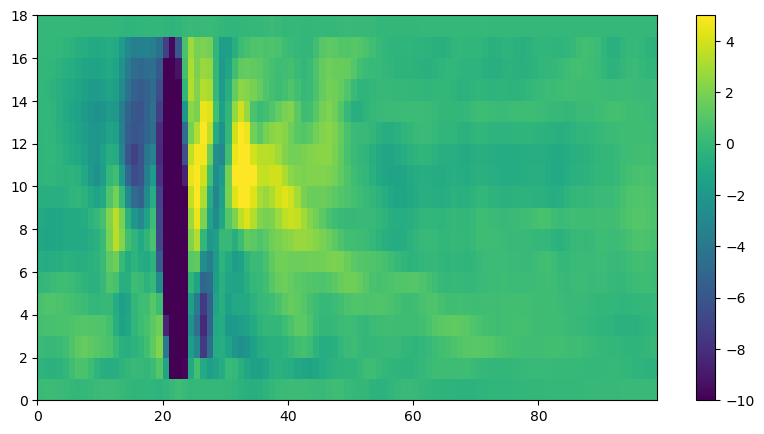

In [129]:
f = plt.figure(figsize=(10,5))
plt.pcolormesh(cross, vmin=-10, vmax=5)
plt.colorbar()

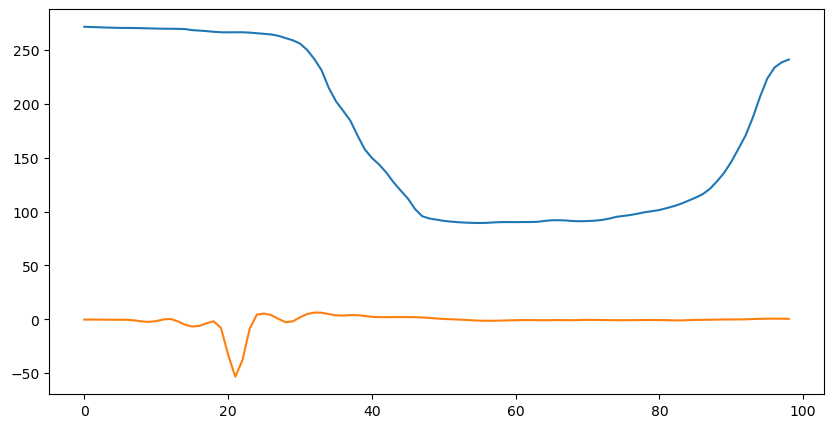

In [128]:
f = plt.figure(figsize=(10,5))
plt.plot(line)
plt.plot(upline)

In [76]:
storm_u.grid_longitude_cu

<xarray.DataArray 'grid_longitude_cu' (grid_longitude_cu: 251)>
array([382.  , 382.04, 382.08, ..., 391.92, 391.96, 392.  ])
Coordinates:
  * grid_longitude_cu  (grid_longitude_cu) float64 382.0 382.0 ... 392.0 392.0
Attributes:
    standard_name:  grid_longitude
    long_name:      longitude in rotated pole grid
    units:          degrees
    axis:           X
    bounds:         grid_longitude_cu_bounds

In [39]:
old_p25 = xr.Dataset(
    {
        "lat": (["lat"], dummy_p25['tcwv'].latitude.values, {"units": "degrees_north"}),
        "lon": (["lon"], dummy_p25['tcwv'].longitude.values, {"units": "degrees_east"}),
    }
)
old_p25

<xarray.Dataset>
Dimensions:  (lat: 113, lon: 151)
Coordinates:
  * lat      (lat) float32 3.633 3.867 4.102 4.336 ... 29.18 29.41 29.65 29.88
  * lon      (lon) float32 -17.75 -17.4 -17.05 -16.7 ... 33.92 34.28 34.63 34.98
Data variables:
    *empty*

In [40]:
old_cp4 = xr.Dataset(
    {
        "lat": (["lat"], dummy_cp4['tcwv'].latitude.values, {"units": "degrees_north"}),
        "lon": (["lon"], dummy_cp4['tcwv'].longitude.values, {"units": "degrees_east"}),
    }
)
old_cp4

<xarray.Dataset>
Dimensions:  (lat: 655, lon: 1309)
Coordinates:
  * lat      (lat) float32 3.5 3.541 3.581 3.622 ... 29.87 29.91 29.95 29.99
  * lon      (lon) float32 -18.0 -17.96 -17.92 -17.88 ... 34.89 34.93 34.97
Data variables:
    *empty*

In [41]:
regridder25 = xe.Regridder(old_p25, new_grid, 'conservative')
regridder25  # print basic regridder information.

xESMF Regridder 
Regridding algorithm:       conservative 
Weight filename:            conservative_113x151_18x36.nc 
Reuse pre-computed weights? False 
Input grid shape:           (113, 151) 
Output grid shape:          (18, 36) 
Periodic in longitude?      False

In [42]:
regridder4 = xe.Regridder(old_cp4, new_grid, 'conservative')
regridder4  # print basic regridder information.

xESMF Regridder 
Regridding algorithm:       conservative 
Weight filename:            conservative_655x1309_18x36.nc 
Reuse pre-computed weights? False 
Input grid shape:           (655, 1309) 
Output grid shape:          (18, 36) 
Periodic in longitude?      False

/opt/jaspy/lib/python3.10/site-packages/xesmf/frontend.py:597: UserWarning: Using dimensions ('latitude', 'longitude') from data variable tcwv as the horizontal dimensions for the regridding.
  warnings.warn(


(array([325., 715., 567.,  70.,  50.,  48.,  56.,  50.,  46.,  17.]),
 array([ 4.475415,  8.865531, 13.255647, 17.645761, 22.035877, 26.425993,
        30.816109, 35.206226, 39.59634 , 43.986458, 48.37657 ],
       dtype=float32),
 <BarContainer object of 10 artists>)

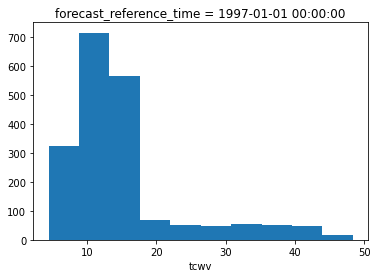

In [44]:
regridder4(dummy_cp4['tcwv'], keep_attrs=True).plot()

In [ ]:
def get_var(var):
    files = sorted(glob.glob(cp4_path+var+'/'+var+'*.nc')) 
    for idp, sf in enumerate(files):  ########restricted files for testing
        fname = os.path.basename(sf).split('_')[-1]
        u_date = fname[0:4]+fname[4:6]+fname[6:8]
        sda = xr.open_dataset(sf)
        
        if int(fname[4:6]) not in [8]:
            continue
        if int(fname[6:8]) not in [1,5,10,15,20,25]:
            continue



In [7]:
cp4_tcwv = xr.open_mfdataset(tcwv/*.nc')

KeyboardInterrupt: 

In [ ]:
cp4_tcwv = xr.open_mfdataset('/gws/nopw/j04/impala/users/cklein/CLOVER/CP4hist/u_pl/*.nc')

In [ ]:
cp4_shear = 